# <center> <span style="color:lightblue">**Principal Component Analysis**</span>

## Feature Selection
| x | y |
|---|---|
| - | - |
| - | - |

### Covariance

$$cov(x,y)=\sum_{i=1}^m \frac{(x_i - \bar{x})*(y_i - \bar{y}) }{N-1}$$

if
$cov(x,y)=+ve$ Positive Relation

$cov(x,y)=-ve$ Negative Relation

$cov(x,y)=0$ No Relation

### Pearson Co-relation

$$\frac{cov(x,y)}{\sigma_x \sigma_y}= -1 \space or +1$$

## Feature Extraction



In [42]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import plotly.express as px
#import sklearn.datasets as datasets

%matplotlib inline

In [4]:
#Load data set
from sklearn.datasets import load_breast_cancer

In [5]:
cancer_dataset=load_breast_cancer()

In [6]:
cancer_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
print(cancer_dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [8]:
df=pd.DataFrame(cancer_dataset["data"],columns=cancer_dataset["feature_names"])
df.sample(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
256,19.550,28.77,133.60,1207.0,0.09260,0.20630,0.17840,0.11440,0.1893,0.06232,...,25.05,36.27,178.60,1926.0,0.1281,0.5329,0.42510,0.19410,0.2818,0.10050
524,9.847,15.68,63.00,293.2,0.09492,0.08419,0.02330,0.02416,0.1387,0.06891,...,11.24,22.99,74.32,376.5,0.1419,0.2243,0.08434,0.06528,0.2502,0.09209
280,19.160,26.60,126.20,1138.0,0.10200,0.14530,0.19210,0.09664,0.1902,0.06220,...,23.72,35.90,159.80,1724.0,0.1782,0.3841,0.57540,0.18720,0.3258,0.09720
139,11.280,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
215,13.860,16.93,90.96,578.9,0.10260,0.15170,0.09901,0.05602,0.2106,0.06916,...,15.75,26.93,104.40,750.1,0.1460,0.4370,0.46360,0.16540,0.3630,0.10590


In [9]:
# Standardization

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [10]:
scaler.fit(df)

StandardScaler()

In [11]:
scale_data=scaler.transform(df)
scale_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [12]:
# Applying PCA Algorithm
from sklearn.decomposition import PCA

In [13]:
pca=PCA(n_components=2)

In [14]:
data_pca=pca.fit_transform(scale_data)
data_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

### The above process is called dimentional Reduction

In [15]:
pca.explained_variance_

array([13.30499079,  5.7013746 ])

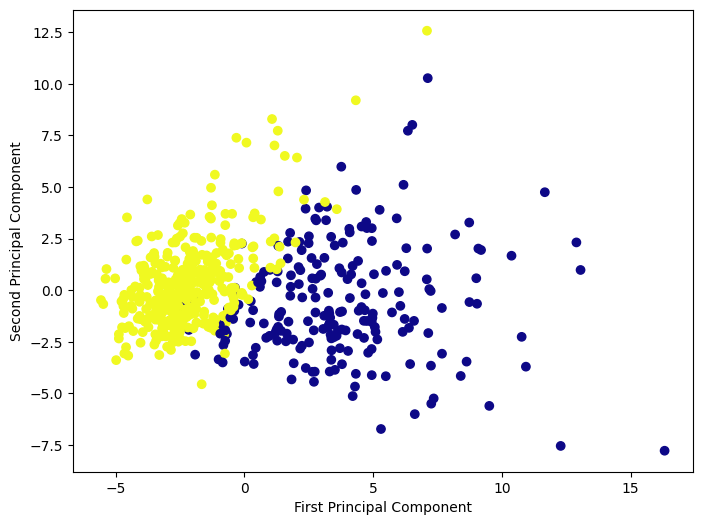

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(data_pca[:,0],data_pca[:,1],c=cancer_dataset["target"],cmap="plasma")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.show()

In [17]:
wcss=[]
pca=0
for i in range(1,10):
    pca=PCA(n_components=i)
    wcss.append(pca.fit_transform(scale_data))
        

In [18]:
wcss

[array([[ 9.19283683],
        [ 2.3878018 ],
        [ 5.73389628],
        [ 7.1229532 ],
        [ 3.93530207],
        [ 2.38024715],
        [ 2.23888331],
        [ 2.1432985 ],
        [ 3.17492429],
        [ 6.35174679],
        [-0.81041377],
        [ 2.65110048],
        [ 8.18503446],
        [ 0.34212591],
        [ 4.34237919],
        [ 4.07565618],
        [ 0.23005502],
        [ 4.41801092],
        [ 4.94870355],
        [-1.23706336],
        [-1.57816123],
        [-3.55733637],
        [ 4.73321079],
        [ 4.20852421],
        [ 4.94963207],
        [ 7.09856285],
        [ 3.5102626 ],
        [ 3.06405389],
        [ 4.00726414],
        [ 1.71530973],
        [ 6.05944551],
        [ 2.9022361 ],
        [ 4.55478269],
        [ 4.99060272],
        [ 2.98534079],
        [ 2.76636916],
        [ 1.29619877],
        [-3.7493134 ],
        [-0.9980689 ],
        [ 0.76526412],
        [-2.15095347],
        [-0.09333139],
        [ 9.08799968],
        [ 0

In [19]:
#plt.plot(range(1,10),wcss[:,0])

In [29]:
pca=PCA(n_components=10)
data_pca_1=pca.fit_transform(scale_data)
pca.explained_variance_

array([13.30499079,  5.7013746 ,  2.82291016,  1.98412752,  1.65163324,
        1.20948224,  0.67640888,  0.47745625,  0.41762878,  0.35131087])

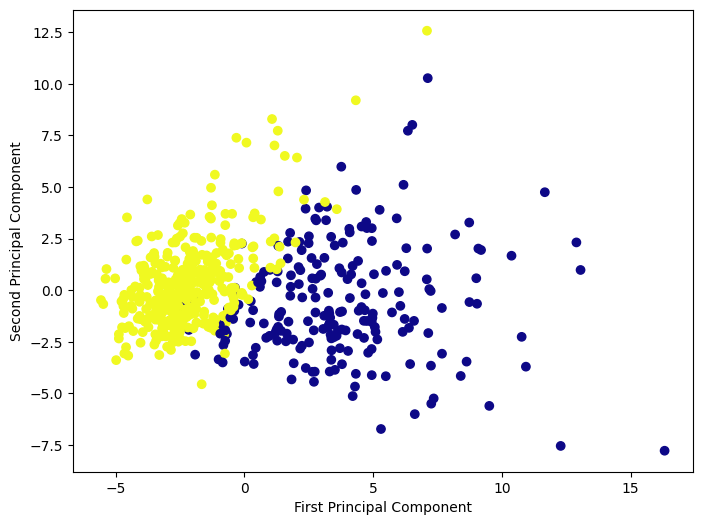

In [41]:
plt.figure(figsize=(8,6))
plt.scatter(data_pca_1[:,0],data_pca_1[:,1],c=cancer_dataset["target"],cmap="plasma")
#,data_pca_1[:,2],data_pca_1[:,3]
#plt.scatter(data_pca_1[:,2],data_pca_1[:,3],c=cancer_dataset["target"],cmap="viridis")
#plt.scatter(data_pca_1[:,4],data_pca_1[:,5],c=cancer_dataset["target"],cmap="Purples")
#plt.scatter(data_pca_1[:,6],data_pca_1[:,7],c=cancer_dataset["target"],cmap="OrRd")
#plt.scatter(data_pca_1[:,8],data_pca_1[:,9],c=cancer_dataset["target"],cmap="magma")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.show()

In [48]:
figure=px.scatter(data_frame=data_pca_1,x=data_pca_1[:,6],y=data_pca_1[:,7],trendline="ols")
figure.show()